# Introduction

Fibers orientation was extracted from the image intensity I(r) and its gradient ∇I. The local direction of the gradient was defined as

$$n=\frac{\nabla I}{∥\nabla I∥}$$

The local orientation of the fibers u(r) is expected to be orthogonal to n. Based on this, the nematic tensor Q.

Q_ij (r)=  δij/2-n_i n_j
There are two differences with the structure tensor from OrientationJ.
	

The spatial correlations of Q were analyzed using the correlation coefficient C, which ranges from -1 to 1 and measures the alignment of orientations. A value of 1 for C means that orientations are completely correlated, while a value of -1 indicates that orientations are anti-correlated, and a value of 0 means that there is no correlation.

C(r)=(∫▒〖Q_ij (r^')Q_ij (r^'+r)d^2 r'〗)/(∫▒〖Q_ij^2 (r^')d^2 r'〗)
Correlations are computed on a 20-pixel-wide window, for images of width ranging from 224 to 328 pixels.

The mean area over which the orientation is correlated is obtained by integrating C over the whole image:

A=∫▒〖C(r)〗 d^2 r


The implementation of this method was done in Python, using scikit-image68 and scipy69. The code is available as a python package upon request. 
The characteristic area (i.e. the bundling score) was calculated in pixel2, and was multiplied by the square of spatial resolution to convert to µm2. The analyzed images were maximum projections of several planes covering the bottom cortical part of the oocyte. All images were corrected for bleaching using histogram matching method in Fiji.

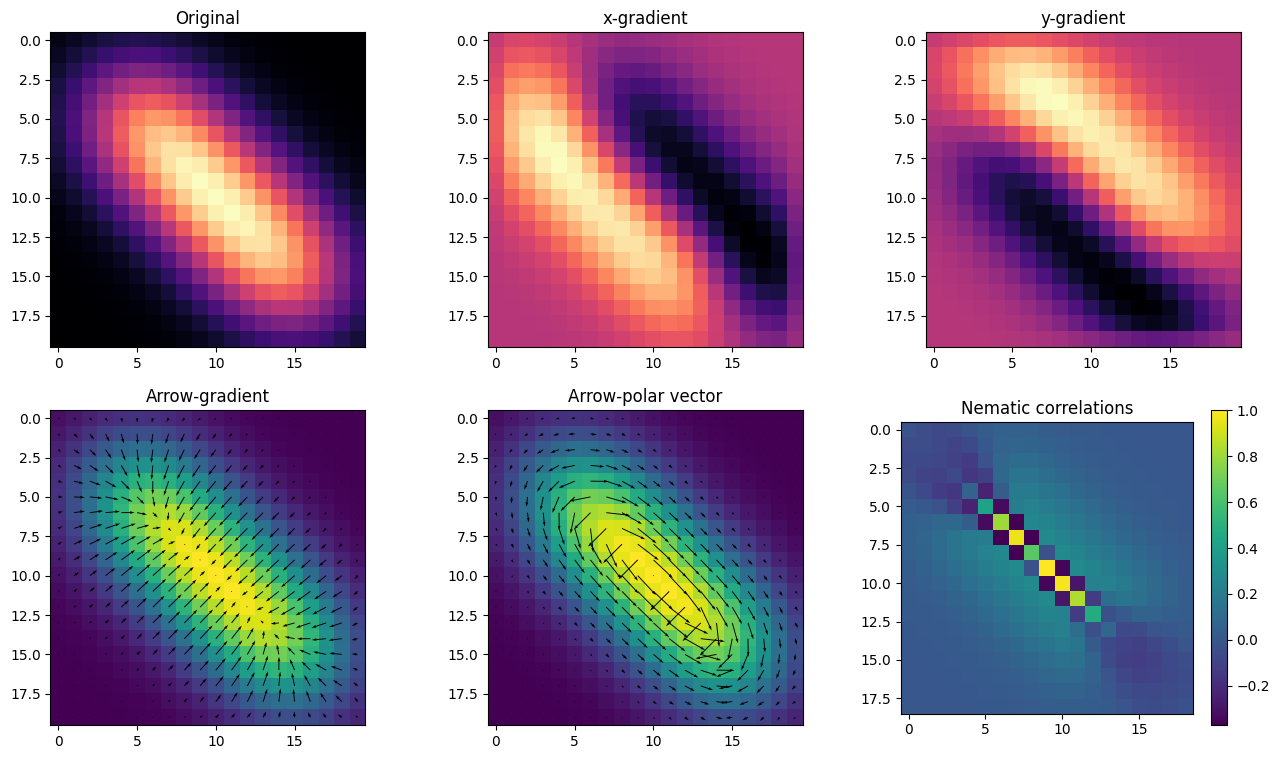

In [61]:
"""Show analysis steps when there is only one rod.

Last update by G. de Labbey, March 1st 2024.
"""

import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

from skimage.draw import line_aa
from skimage.filters import gaussian

import bundling_score.bundling_score as bs
import bundling_score.plots as bp

N = 20
Nrods = 3
smax = 9

sigma = 3

image = np.zeros((N, N))
rr, cc, val = line_aa(4, 4, N-4, N-4)
image[rr, cc] += val
image = gaussian(image, sigma=sigma)

# Show method
bp.show_steps(image, smax=smax)